In [2]:
import pandas as pd
from pandas_datareader import data
# pandas uses this to plot
import matplotlib.pyplot as plt

# By default matplotlib would plot outside of the notebook. We need to fix that so that it renders inline
%matplotlib inline

# Make the plots larger
plt.rcParams['figure.figsize'] = (15.0, 7.5)

# Section 13; Part 164
The `.plot()` method

In [5]:
# Get stock information for Blackberry
bb = data.DataReader(name = 'BBRY', data_source='google', start='2007-07-01', end='2008-12-31')
bb.head()

,Open,High,Low,Close,Volume
Date,,,,,
2007-07-02,201.97,215.40,199.07,214.26,18888168
2007-07-03,215.48,216.89,206.40,207.94,8835540
2007-07-05,216.46,217.30,209.01,216.19,13251409
2007-07-06,214.77,218.00,212.60,215.35,8035368
2007-07-09,216.32,217.74,213.83,214.40,5585887


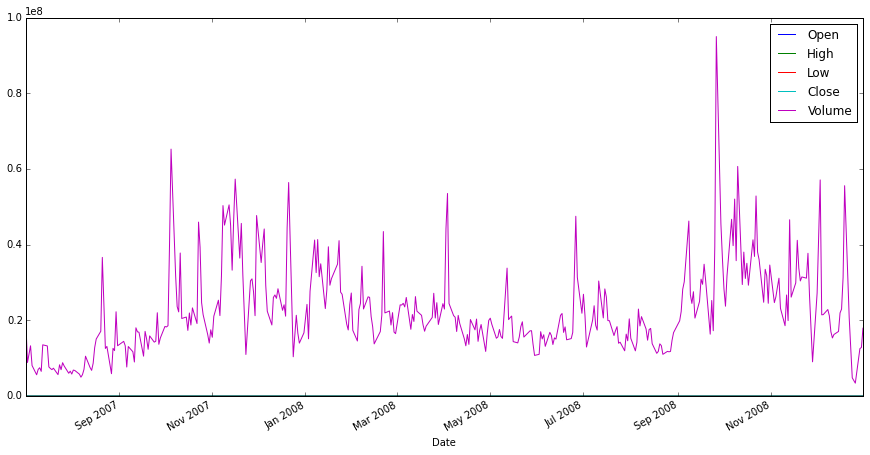

In [12]:
# Calling plot directly on the dataframe:
bb.plot()

# X axis is the months, which is the dataframe index

Seems that volume is the only thing plotted, but because volume is so much larger than the others, you can't see them. The Y axis has a scale that drawfs the other values.

`.plot` can be called on a specific column

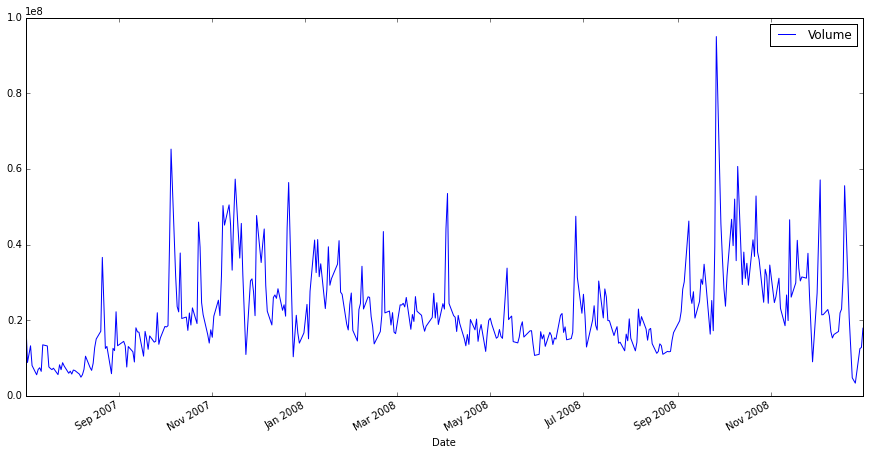

In [13]:
# y -> Name of column(s) to plot
bb.plot(y='Volume')

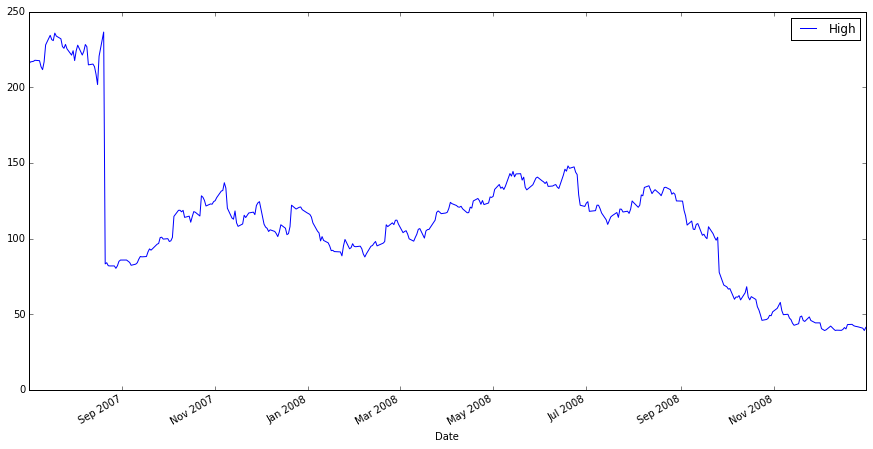

In [14]:
bb.plot(y='High')

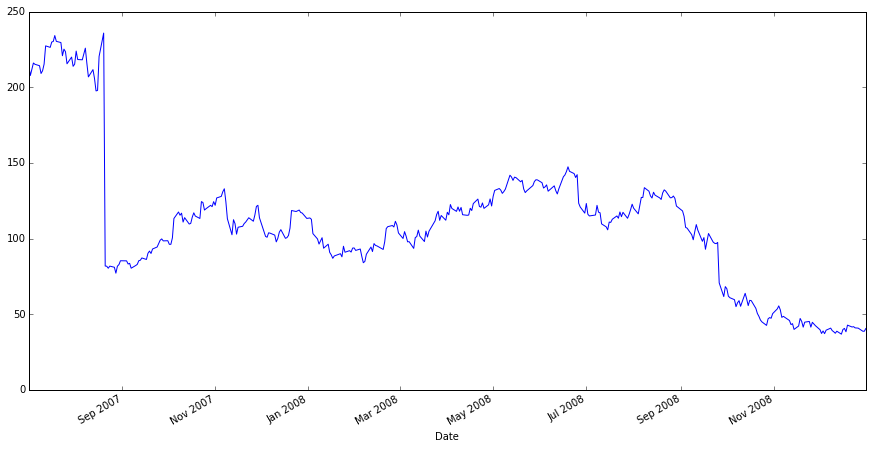

In [16]:
# Can also call plot directly on a series
bb['Close'].plot()

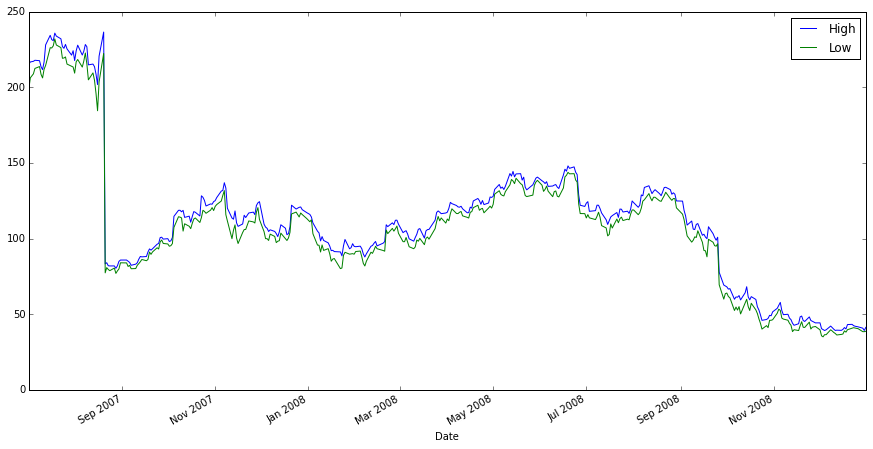

In [17]:
# Plots two columns
bb[['High', 'Low']].plot()

# Section 13; Part 165
Modifying aesthetics with templates

**Templates apply to the entire notebook from the current cell forward, not just the current cell**

In [3]:
# Available templates
plt.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn-dark-palette']

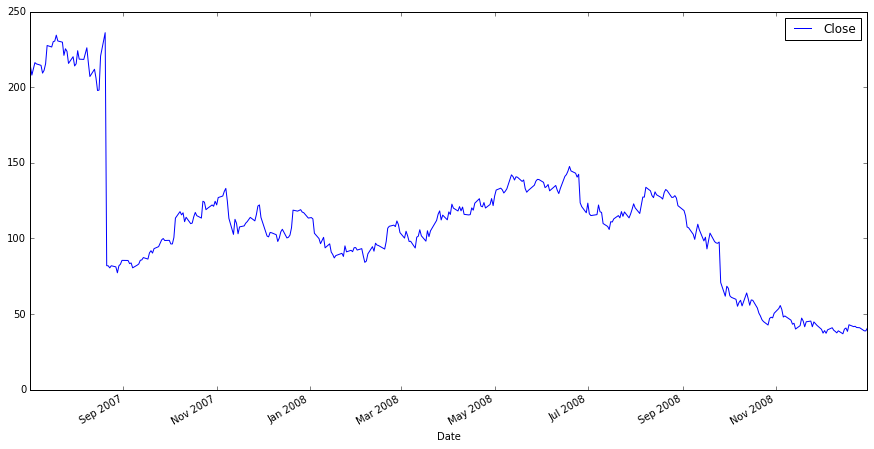

In [6]:
# Default plot
bb.plot(y = "Close")

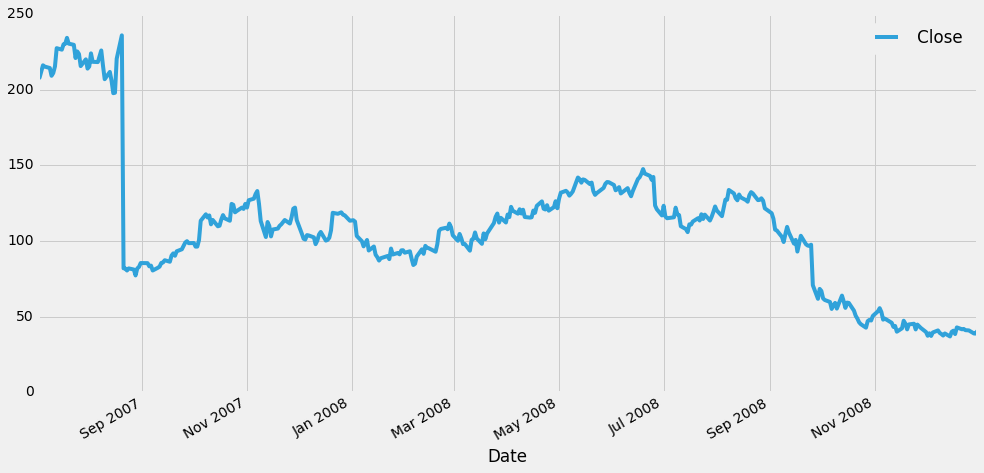

In [7]:
# Change style
# **THIS CHANGES IT FOR THE ENTIRE NOTEBOOK**
plt.style.use('fivethirtyeight')
bb.plot(y = "Close")

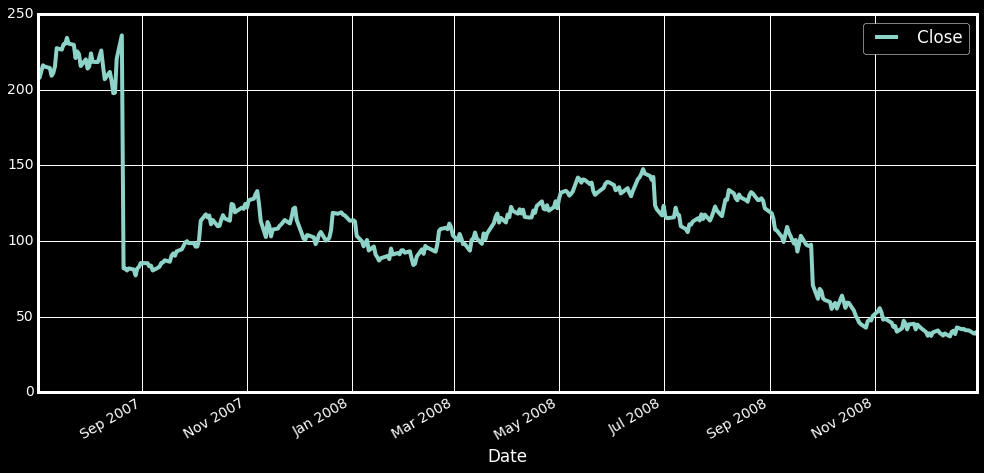

In [8]:
plt.style.use('dark_background')
bb.plot(y = "Close")

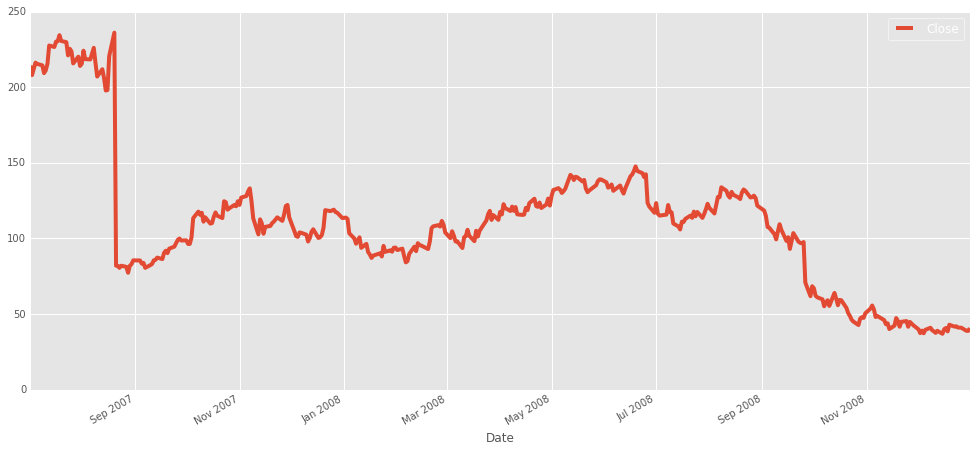

In [9]:
plt.style.use('ggplot')
bb.plot(y = "Close")

# Section 13; Part 166
Bar Charts

In [10]:
google = data.DataReader(name = 'GOOG', data_source = 'google', start='2004-01-01', end='2016-12-31')
google.head()

,Open,High,Low,Close,Volume
Date,,,,,
2004-08-19,49.96,51.98,47.93,50.12,NaN
2004-08-20,50.69,54.49,50.20,54.10,NaN
2004-08-23,55.32,56.68,54.47,54.65,NaN
2004-08-24,55.56,55.74,51.73,52.38,NaN
2004-08-25,52.43,53.95,51.89,52.95,NaN


In [11]:
# Rank performance based on our logic
#   < 200 = Poor
#   200 < x < 500 = Satisfactory
#   > 500 = Excellent
def rank_performance(stock_price):
    if stock_price <= 200:
        return "Poor"
    elif stock_price > 200 and stock_price <= 500:
        return "Satisfactory"
    else:
        return "Excellent"

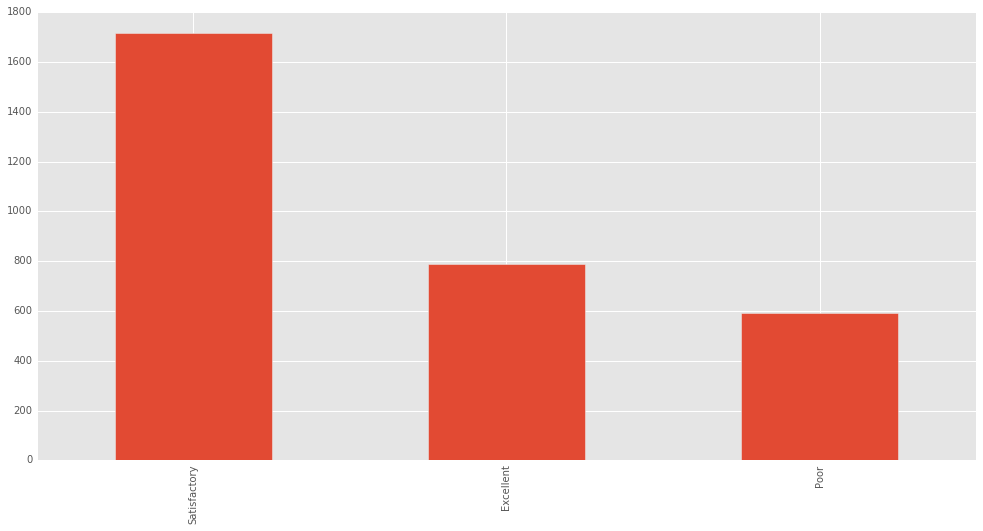

In [15]:
# A bar chart would work perfectly for showing how value counts

# kind - Default is 'line'; Want 'bar' to get a bar chart
google['Close'].apply(rank_performance).value_counts().plot(kind = 'bar')

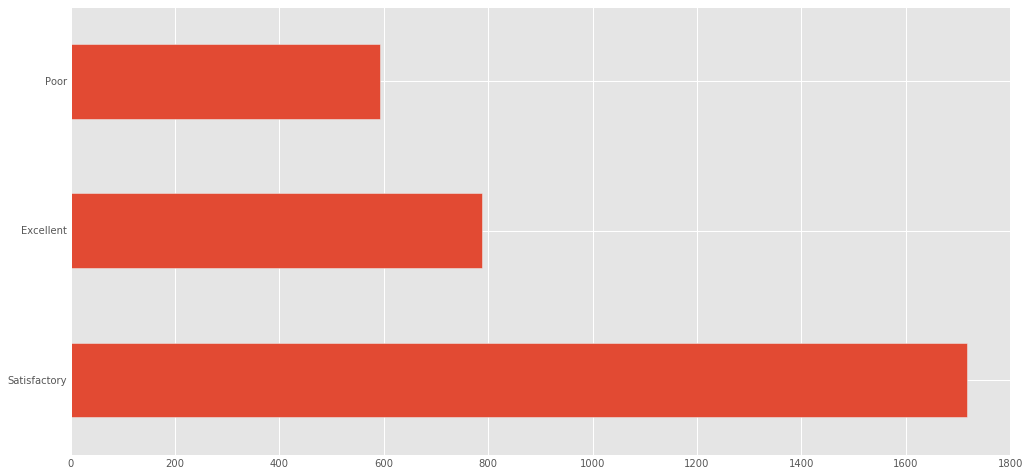

In [16]:
# Horizontal barchart - kind = barh
google['Close'].apply(rank_performance).value_counts().plot(kind = 'barh')

# Section 13; Part 167
Pie Charts

In [17]:
apple = data.DataReader(name = 'AAPL', data_source = 'google', start='2012-01-01', end='2016-12-31')
apple.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,58.49,58.93,58.43,58.75,75564699
2012-01-04,58.57,59.24,58.47,59.06,65061108
2012-01-05,59.28,59.79,58.95,59.72,67816805
2012-01-06,59.97,60.39,59.89,60.34,79596412
2012-01-09,60.79,61.11,60.19,60.25,98505792


In [19]:
# Compare each day's close price to average
stock_mean = apple['Close'].mean()
stock_mean

93.08893000804508

In [20]:
def rank_performance(stock_price):
    if stock_price >= stock_mean:
        return "Above"
    else:
        return "Below"

In [22]:
apple['Close'].apply(rank_performance).value_counts()

Above    648
Below    595
Name: Close, dtype: int64

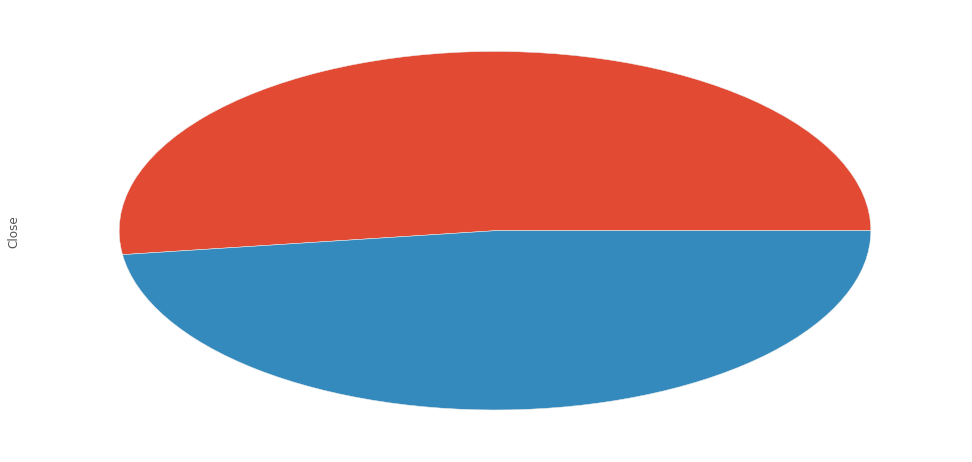

In [23]:
# Plot the above as a pie chart
apple['Close'].apply(rank_performance).value_counts().plot(kind='pie')

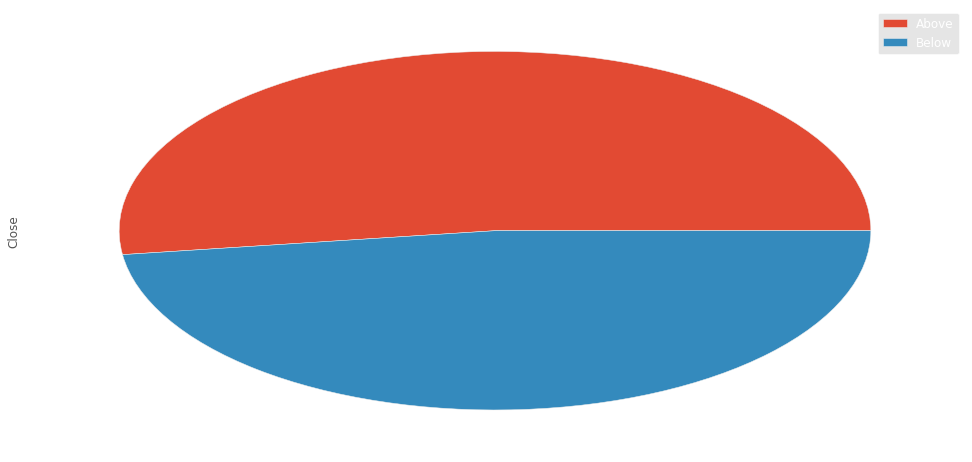

In [24]:
# Legend is missing in the above. Fix by setting 'legend' = True
apple['Close'].apply(rank_performance).value_counts().plot(kind='pie', legend=True)

# Section 13; Part 168
Histograms

 - Show distributions

In [25]:
google = data.DataReader(name = 'GOOG', data_source = 'google', start='2004-01-01', end='2016-12-31')
google.head()

,Open,High,Low,Close,Volume
Date,,,,,
2004-08-19,49.96,51.98,47.93,50.12,NaN
2004-08-20,50.69,54.49,50.20,54.10,NaN
2004-08-23,55.32,56.68,54.47,54.65,NaN
2004-08-24,55.56,55.74,51.73,52.38,NaN
2004-08-25,52.43,53.95,51.89,52.95,NaN


In [26]:
# Create buckets of Googles stock prices in buckets of 100 

# This function rounds down
def custom_round(stock_price):
    return int(stock_price / 100.0) * 100

In [34]:
google['High'].apply(custom_round).value_counts().sort_index()

0       157
100     414
200    1129
300     449
400     159
500     414
600     107
700     262
800       8
Name: High, dtype: int64

In [36]:
google['High'].apply(custom_round).nunique()

9

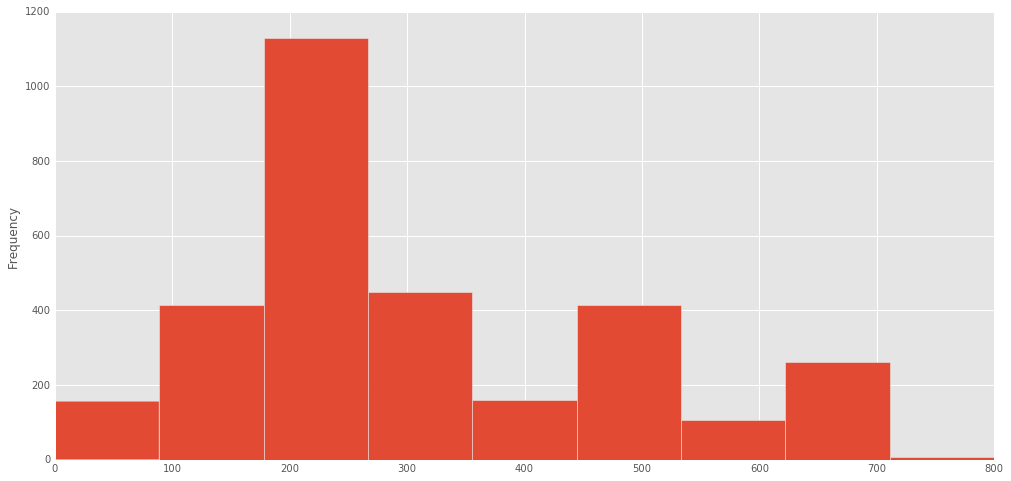

In [37]:
google['High'].apply(custom_round).plot(kind='hist', bins=google['High'].apply(custom_round).nunique())